In [1]:
## Code by Eric Englin
## This is a project for Team B3 in Harvard Kennedy School Code 4 Policy course
# This jupyter notebook pulls historical NYSE stock data for major companies in the auto & tech industry
# Please note that many car companies do not participate in the NYSE, so these companies will not show up in this analysis

##Code originally forked from CNuge repo kaggle-code, stock data

In [2]:
from datetime import datetime
from concurrent import futures
import matplotlib.pyplot as plt

import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web


auto = ['TSLA','TM','NVDA','RACE','GM','HMC','FUV','HOG','FCAU','F','KNDI',
        'NIO','TTM','SPAR','WKHS','GOOGL']

autoname = {
    'TSLA':'Tesla',
    'TM':'Toyota',
    'RACE':'Ferrari',
    'GM':'GM',
    'HMC':'Honda',
    'FUV':'Arcimoto',
    'NVDA':'Nvidia',
    'HOG':'HarleyDavidson',
    'FCAU':'FiatChrysler',
    'F':'Ford',
    'KNDI':'KandiTechnologiesInc',
    'NIO':'NIO',
    'TTM':'TataMotors',
    'SPAR':'SpartanMotors',
    'WKHS':'WorkhorseGroupInc',
    'GOOGL':'Google'
}

now_time = datetime.now()
start_time = datetime(now_time.year - 5, now_time.month , now_time.day)
stock_df=[]
df = pd.DataFrame([])
stockplot=[]


for x in auto:
    print(x)
    stock_df = web.DataReader(x,'iex', start_time, now_time)
    stock_df['Name'] = x
    stock_df['RealName'] = autoname[x]
    df = df.append(stock_df)
    stockplot = stock_df.drop(['high','low','volume','close'],axis=1)
    RealName=stockplot['RealName']
    stockplot.plot()
    plt.axis()
    plt.title(autoname[x])
    plt.show()
    

TSLA


TM


NVDA


RACE


GM


HMC


FUV


HOG


FCAU


F


KNDI


NIO


TTM


SPAR


WKHS


GOOGL


In [3]:
#Look at the table to ensure that table starts 5 years ago with Tesla
#Also want to make sure that RealName variable came through
pd.DataFrame.head(df)

,open,high,low,close,volume,Name,RealName
date,,,,,,,
2014-01-21,171.24,177.290,170.810,176.68,9745765,TSLA,Tesla
2014-01-22,177.81,180.319,174.760,178.56,7036758,TSLA,Tesla
2014-01-23,177.23,182.380,173.420,181.50,7899515,TSLA,Tesla
2014-01-24,177.85,180.480,173.531,174.60,7711296,TSLA,Tesla
2014-01-27,175.16,177.920,164.710,169.62,8737773,TSLA,Tesla


In [4]:
#Look at tail to make sure it is yesterday with GOOGL
pd.DataFrame.tail(df)

,open,high,low,close,volume,Name,RealName
date,,,,,,,
2019-01-14,1053.34,1058.45,1048.55,1051.51,1424486,GOOGL,Google
2019-01-15,1058.01,1088.27,1054.44,1086.51,1875852,GOOGL,Google
2019-01-16,1090.00,1102.36,1088.01,1089.51,1914041,GOOGL,Google
2019-01-17,1087.99,1100.70,1083.26,1099.12,1244801,GOOGL,Google
2019-01-18,1108.59,1118.00,1099.28,1107.30,2244569,GOOGL,Google


In [5]:
#Save as a final csv for data visualization
df.to_csv('./data/stock_5_years_rows.csv')

In [6]:
df_Tesla = df[df['Name']=='TSLA']
pd.DataFrame.tail(df_Tesla)

,open,high,low,close,volume,Name,RealName
date,,,,,,,
2019-01-14,342.38,342.5000,334.0000,334.40,5247284,TSLA,Tesla
2019-01-15,335.00,348.8000,334.5000,344.43,6056590,TSLA,Tesla
2019-01-16,344.78,352.0000,343.5000,346.05,4691739,TSLA,Tesla
2019-01-17,346.21,351.5000,344.1500,347.31,3676733,TSLA,Tesla
2019-01-18,323.00,327.1297,299.7301,302.26,24150763,TSLA,Tesla


In [7]:
df_Tesla=df_Tesla.drop(['high','low','volume','open'],axis=1)

In [8]:
# We want our dates in 16-Apr-12 format
list(df_Tesla.columns.values)

['close', 'Name', 'RealName']

In [9]:
#Building visualization specific to Telsa to start
#Save as a final csv for data visualization
df_Tesla.to_csv('./data/Tesla_Stock.csv')

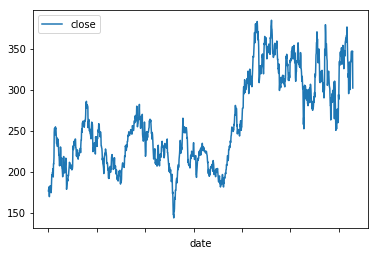

In [10]:
df_Tesla.plot()

In [11]:
import csv
df_datacol = pd.read_csv('./data/stock_5_years_rows.csv')

In [12]:
dfnew = df_datacol.drop(['high','low','volume','open','Name'],axis=1)
dfnew=dfnew.pivot(index='date', columns='RealName', values='close')

In [13]:
list(dfnew)

['Arcimoto',
 'Ferrari',
 'FiatChrysler',
 'Ford',
 'GM',
 'Google',
 'HarleyDavidson',
 'Honda',
 'KandiTechnologiesInc',
 'NIO',
 'Nvidia',
 'SpartanMotors',
 'TataMotors',
 'Tesla',
 'Toyota',
 'WorkhorseGroupInc']

In [25]:
dfnew['Arcimoto'].fillna(0, inplace=True)
dfnew['Ferrari'].fillna(0, inplace=True)
dfnew['FiatChrysler'].fillna(0, inplace=True)
dfnew['NIO'].fillna(0, inplace=True)

In [26]:
col = dfnew.loc[: , ("FiatChrysler","Ford","GM","Honda","Toyota")]
dfnew['ManufacturerAverage'] = col.mean(axis=1)
dfnew.head()

RealName,Arcimoto,Ferrari,FiatChrysler,Ford,GM,Google,HarleyDavidson,Honda,KandiTechnologiesInc,NIO,Nvidia,SpartanMotors,TataMotors,Tesla,Toyota,WorkhorseGroupInc,salary_mean,ManufacturerAverage
date,,,,,,,,,,,,,,,,,,
2014-01-21,0.0,0.0,0.0,12.6217,31.2460,582.4319,59.1538,34.7440,13.33,0.0,15.2614,6.2552,30.6401,176.68,103.2031,1.101,36.36296,36.36296
2014-01-22,0.0,0.0,0.0,12.7294,31.6209,583.0925,58.5931,34.6481,13.90,0.0,15.2424,6.2460,31.2079,178.56,104.2569,1.150,36.65106,36.65106
2014-01-23,0.0,0.0,0.0,12.6371,31.3112,580.6300,57.7344,33.9677,13.11,0.0,15.1853,6.0882,30.3512,181.50,102.2607,1.200,36.03534,36.03534
2014-01-24,0.0,0.0,0.0,12.1756,30.0154,562.4769,56.0958,33.1477,12.37,0.0,14.7954,5.8005,28.7276,174.60,100.9927,1.250,35.26628,35.26628
2014-01-27,0.0,0.0,0.0,12.0833,29.9584,551.1656,56.2711,33.2175,11.61,0.0,14.7004,5.6241,27.1438,169.62,100.2645,1.139,35.10474,35.10474


In [31]:
dfnew.to_csv('./data/stock_5_years_columns.csv',index=True)